<h2>Project: Investigating Fandango Movie Rating</h2>

In this project we are going to explore the ratings showed on the fandango wesite and see if there is the issue that caused ratings to be rounded up significantly is fixed 

In order to do that, we need to explroe the data before and after the alleged fix. Walt Hickey made the data he analyzed publicly available on GitHub.
https://github.com/fivethirtyeight/data/tree/master/fandango

The new data set was collected by dataquest and can be found here:
https://github.com/mircealex/Movie_ratings_2016_17

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [5]:
before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

To simplify our analysis we will take only the relevant columns:

In [6]:
before_clean = before[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']]

In [7]:
before_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [8]:
after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [9]:
after_clean = after[['movie', 'year', 'fandango']]

In [10]:
after_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


In [11]:
after_clean.shape

(214, 3)

In [12]:
before_clean.shape

(146, 5)

In [13]:
after_clean.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


before_clean.head()

The before population contains movie ratings  . 24, 2015. Included movies are: every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango.  The after data set contains 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017 untill March 22, 2017.  
By these 2 sets of data we can check if there is a difference between the ratings done before Walt Hickey published his findings (on OCT. 15, 2015,) ot the rounding up and after, when fandango assumingly fixed the issue.


These are not random samples but a set of the more popular movies and thus might not represent the whole population. So we can change our goals: our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. (without inferring to the whole population)

In order to define what is a popular movie, we will use Hickey's definition: if it has 30 fan ratings or more on Fandango's website.  
let's check if our population from both data sets comply with this definition:

In [14]:
print (before_clean[before_clean['Fandango_votes'] < 30].size)

0


This means the before sample doesn't include any movies with less than 30 votes which is great.  
For the second data set this is more challenging since it doesn't contain a column with votes. in order to check it we can do a sample of some ofthe movies and check on the fandango's site how many votes the movie got.

In [15]:
after_clean.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Movie	Fan ratings  
Mechanic: Resurrection	2247  
Warcraft	7271  
Max Steel	493  
Me Before You	5263  
Fantastic Beasts and Where to Find Them	13400  
Cell	17  
Genius	127  
Sully	11877  
A Hologram for the King	500  
Captain America: Civil War	35057  

So 9 out of 10 have way more than 30 voters which means it is pretty safe to say that these movies comply with the definitio of popular movies

In [16]:
after_final = after_clean[after_clean['year']==2016] 

In [17]:
after_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 213
Data columns (total 3 columns):
movie       191 non-null object
year        191 non-null int64
fandango    191 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


The before data set doesn't have a year column but we can create it using the text included in the 'FILM' column

In [18]:
before_clean['year'] = before_clean['FILM'].str[-5:-1].copy()
before_clean['year'] = before_clean['year'].astype(int).copy()
before_clean.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [19]:
before_final = before_clean[before_clean['year'] ==2015]

In [20]:
before_final.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


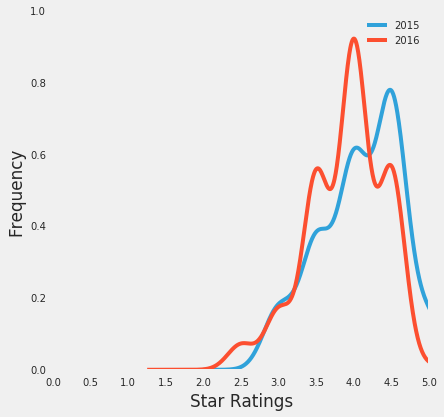

In [21]:
labels = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
before_final['Fandango_Stars'].plot.kde(label='2015', grid = False);
after_final['fandango'].plot.kde(label = '2016', grid=False);
plt.xlabel('Star Ratings')
plt.ylabel('Frequency')
plt.legend()
ax.set_xlim(0,5)
ax.set_xticks(labels)

plt.show()


In [22]:
before_final['Fandango_Stars'].describe()

count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [23]:

after_final['fandango'].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

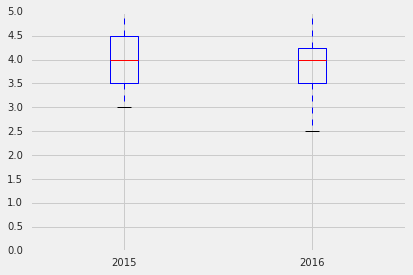

In [31]:
fig, ax = plt.subplots()
ax.boxplot([before_final['Fandango_Stars'], after_final['fandango']])
ax.set_yticks(labels)
ax.set_xticklabels(['2015', '2016'])
plt.show()


Looking at the graph as ell as the statistic data we can see that there is a change in the rating values. in 2015 the minimum rating was 3 and the mean was 4 while in 2016 the min was 2 and the mean was 3.88  
Also by the look of the ditribution we can see that 2016 while still left skewed looks a bit more normal distribution while 2015 is heavily left skewed. So based on that is is my conclusion that Fandango have made some changes in the rating system for popular movies

Let's take  a closer look on the mean, median and mode 

In [32]:
mean_2015 = before_final['Fandango_Stars'].mean()
mean_2016 = after_final['fandango'].mean()

median_2015 = before_final['Fandango_Stars'].median()
median_2016 = after_final['fandango'].median()

mode_2015 = before_final['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = after_final['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


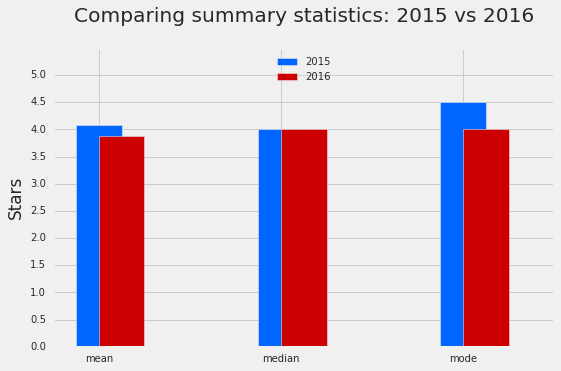

In [36]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

<h2> Conclusions</h2>

After examining the data it does see m there there is a difference between  
the 2 samples, and 2016 shows that movies were rated lower than in 2015.  
We can't tell for sure what is the cuase for this change but it is possible that it has something to do with Hickey's findings